# AVIATION ACCIDENT ANALYSIS

## Business Understanding

### Project Goal
The objective of this project is to provide data-driven insights to support our company’s strategic expansion into the aviation sector. Using historical aviation accident data, we aim to identify aircraft models, manufacturers, or operational characteristics associated with lower risk profiles. These insights will inform purchasing decisions for both commercial and private aviation operations, helping the company enter this market with a strong understanding of operational safety and associated risks.

### Stakeholder
The primary stakeholder is the head of the company’s new aviation division. This individual is responsible for assessing investment opportunities, mitigating operational risks, and selecting aircraft for acquisition. While technically proficient in business strategy, the stakeholder may not have a background in data science or aviation analytics. Therefore, our deliverables must translate complex data into clear, actionable insights that directly support business decisions.

### Business Context
As the company looks to diversify its portfolio, the aviation industry presents both high potential and high risk. Aircraft safety, reliability, and accident history are crucial factors in evaluating which aircraft will provide the best return on investment with the lowest liability. Entering this space without understanding aviation risks could expose the company to avoidable costs, reputational damage, and operational setbacks.

This project seeks to reduce that uncertainty by analyzing over 60 years of aviation accident data, surfacing patterns and trends that can guide strategic decisions.

### Core Business Questions
To ensure the analysis aligns with business goals, we are focusing on the following key questions:

- **Which aircraft manufacturers and models have the lowest accident rates?**
- **What operational or environmental factors (e.g., location, weather, time of day) correlate with increased risk?**
- **How have accident trends evolved over time, and what insights can be drawn for future planning?**
- **What recommendations can be made to prioritize safety and reliability in aircraft purchasing decisions?**

By answering these questions, this project will deliver three concrete business recommendations tailored to the needs of the aviation division, helping guide safe and strategic market entry.


##  Data Understanding

The dataset, sourced from the National Transportation Safety Board (NTSB), provides a comprehensive record of civil aviation accidents and selected incidents from 1962 through early 2023. This extensive temporal coverage gives us a longitudinal view of aviation safety trends across decades and allows for the identification of patterns in aircraft incidents and risks over time.

After initial inspection, the dataset contains **89 columns** and over **93,000 rows**, capturing a wide range of variables—from basic metadata like event IDs and dates to highly specific details such as aircraft engine types, damage extent, flight phases, and weather conditions.

Key observations from the initial data exploration include:

- **Missing Data**: Several columns contain a significant proportion of missing values. For instance, narrative fields like `weather_condition`, `injury_severity`, and `aircraft_damage` are sparsely populated in certain years. These will require careful imputation or exclusion based on relevance and completeness.
- **Data Types**: Most fields are strings or categorical variables. Columns such as `injury_severity`, `aircraft_damage`, and `aircraft_category` will benefit from encoding for analysis.
- **Irrelevant Columns**: Several columns (e.g., `investigation_type`, `report_status`, `publication_date`) may not be necessary for addressing the business problem and could be dropped to streamline analysis.
- **Duplicate & Redundant Data**: Columns such as `make`, `model`, and `aircraft_serial_number` may appear redundant depending on the level of aggregation. Deduplication may be required after confirming their unique combinations.

This understanding forms the foundation for strategic data preparation and business-focused insights. Our next step is to clean and prepare the dataset to identify which aircraft types, conditions, and flight characteristics correlate most strongly with lower incident severity and frequency.


In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset with alternative encoding
file_path = 'data/AviationData.csv'
df = pd.read_csv(file_path, encoding='latin1')

# View the shape of the dataset
print(f"Dataset contains {df.shape[0]:,} rows and {df.shape[1]} columns.")

# Display the first 5 rows of the dataset
df.head()

Dataset contains 88,889 rows and 31 columns.


C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Data Preparation
The goal here is to prepare a high-quality dataset that enables effective business analysis and modeling. Based on our earlier data understanding, we'll focus on the following key tasks:

### Drop Irrelevant Columns

These are metadata or administrative fields that don't contribute to understanding accident patterns.

In [2]:
irrelevant_cols = [
    'investigation_type', 'report_status', 'publication_date',
    'airport_name', 'airport_code', 'latitude', 'longitude',
    'event_id', 'registration_number', 'aircraft_serial_number'
]

df.drop(columns=irrelevant_cols, inplace=True, errors='ignore')


### Handle Missing Values

We’ll start by checking the percentage of missing data per column and drop columns that are largely empty or irrelevant.

In [3]:
# Display missing data percentage
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
print(missing_percent.head(20))

Schedule                  85.845268
Air.carrier               81.271023
FAR.Description           63.974170
Aircraft.Category         63.677170
Longitude                 61.330423
Latitude                  61.320298
Airport.Code              43.469946
Airport.Name              40.611324
Broad.phase.of.flight     30.560587
Publication.Date          15.492356
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Fatal.Injuries      12.826109
Engine.Type                7.961615
Report.Status              7.178616
Purpose.of.flight          6.965991
Number.of.Engines          6.844491
Total.Uninjured            6.650992
Weather.Condition          5.053494
Aircraft.damage            3.593246
dtype: float64


In [4]:
threshold = 0.7  # 70%
df = df.loc[:, df.isnull().mean() < threshold]

### Standardize Categorical Columns

 Convert text fields to lowercase and strip spaces to prepare for encoding.

In [5]:
cat_cols = df.select_dtypes(include='object').columns

df[cat_cols] = df[cat_cols].apply(lambda col: col.str.lower().str.strip())

### Convert Dates and Extract Features

Convert the event_date into datetime format and extract useful features like year and month.

In [6]:
print(df.columns.tolist())

['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date']


In [7]:
# Convert 'Event.Date' to datetime format
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# Extract year and month from the date
df['event_year'] = df['Event.Date'].dt.year
df['event_month'] = df['Event.Date'].dt.month

### Encode Target and Important Features

For analysis and modeling, we’ll encode key categorical variables:

In [8]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Injury.Severity', 'Aircraft.damage', 'Aircraft.Category']

le = LabelEncoder()
for col in label_cols:
    if df[col].notnull().sum() > 0:
        df[col] = le.fit_transform(df[col].astype(str))

### Final Check

Verifying the shape, datatypes, and null values:

In [9]:
print(df.shape)
print(df.dtypes)
print(df.isnull().sum().sort_values(ascending=False).head(10))

(88889, 31)
Event.Id                          object
Investigation.Type                object
Accident.Number                   object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Latitude                          object
Longitude                         object
Airport.Code                      object
Airport.Name                      object
Injury.Severity                    int32
Aircraft.damage                    int32
Aircraft.Category                  int32
Registration.Number               object
Make                              object
Model                             object
Amateur.Built                     object
Number.of.Engines                float64
Engine.Type                       object
FAR.Description                   object
Purpose.of.flight                 object
Total.Fatal.Injuries             float64
Total.Serious.Injuries           float64
Total.Minor.Injuries             float64
Tota

In [15]:
# 1. Drop unnecessary columns with high missing values
df_cleaned = df.drop(columns=['FAR.Description', 'Longitude', 'Latitude'])

# 2. Fill missing numeric injury columns with 0
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

for col in injury_cols:
    df_cleaned[col] = df_cleaned[col].fillna(0)

# 3. Fill missing categorical columns with 'Unknown'
cat_cols = ['Airport.Code', 'Airport.Name', 'Broad.phase.of.flight', 'Weather.Condition', 'Publication.Date']

for col in cat_cols:
    df_cleaned[col] = df_cleaned[col].fillna('Unknown')

# 4. Confirm cleaning - check shape, data types, and nulls
print(df_cleaned.shape)
print(df_cleaned.dtypes)
print(df_cleaned.isnull().sum().sort_values(ascending=False).head(10))


(88889, 28)
Event.Id                          object
Investigation.Type                object
Accident.Number                   object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Airport.Code                      object
Airport.Name                      object
Injury.Severity                    int32
Aircraft.damage                    int32
Aircraft.Category                  int32
Registration.Number               object
Make                              object
Model                             object
Amateur.Built                     object
Number.of.Engines                float64
Engine.Type                       object
Purpose.of.flight                 object
Total.Fatal.Injuries             float64
Total.Serious.Injuries           float64
Total.Minor.Injuries             float64
Total.Uninjured                  float64
Weather.Condition                 object
Broad.phase.of.flight             object
Repo

In [16]:
# Fill categorical missing values with 'Unknown'
cat_cols_final = ['Engine.Type', 'Report.Status', 'Purpose.of.flight', 
                  'Registration.Number', 'Country', 'Model', 'Make', 'Location']

for col in cat_cols_final:
    df_cleaned[col] = df_cleaned[col].fillna('Unknown')

# Fill Number.of.Engines with 0
df_cleaned['Number.of.Engines'] = df_cleaned['Number.of.Engines'].fillna(0)

# Fill Amateur.Built with 'No'
df_cleaned['Amateur.Built'] = df_cleaned['Amateur.Built'].fillna('No')

# Final check - no missing values!
print(df_cleaned.isnull().sum().sort_values(ascending=False))

event_month               0
event_year                0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
Event.Id                  0
dtype: int64


## Exploratory Data Analysis

Identifying factors that correlate with lower incident severity and frequency

### Incident Severity Distribution

How often do different levels of severity occur?

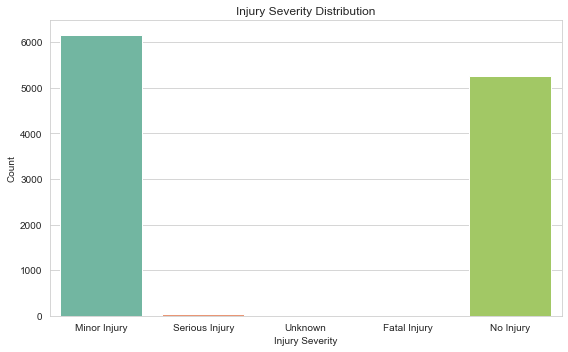

In [19]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set a clean style for all plots
sns.set_style('whitegrid') 
# Mapping numeric codes to actual severity labels (example mapping)
injury_severity_mapping = {
    0: 'No Injury',
    1: 'Minor Injury',
    2: 'Serious Injury',
    3: 'Fatal Injury',
    4: 'Unknown', 
    # ... add other mappings if needed
}

# Apply the mapping
df_cleaned['Injury.Severity'] = df_cleaned['Injury.Severity'].map(injury_severity_mapping)

# Incident Severity Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='Injury.Severity', palette='Set2')
plt.title('Injury Severity Distribution')
plt.xlabel('Injury Severity')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


### Top Aircraft Makes in Incidents

Which aircraft brands are most frequently involved?

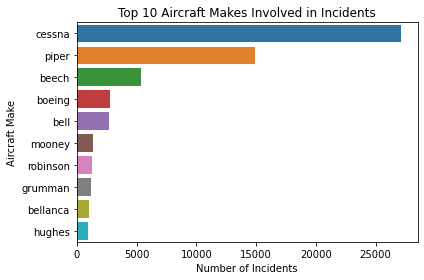

In [11]:
top_makes = df['Make'].value_counts().head(10)

sns.barplot(x=top_makes.values, y=top_makes.index)
plt.title('Top 10 Aircraft Makes Involved in Incidents')
plt.xlabel('Number of Incidents')
plt.ylabel('Aircraft Make')
plt.tight_layout()
plt.show()

### Severity by Flight Purpose

Is there a relationship between flight purpose (e.g., personal, commercial) and injury severity?

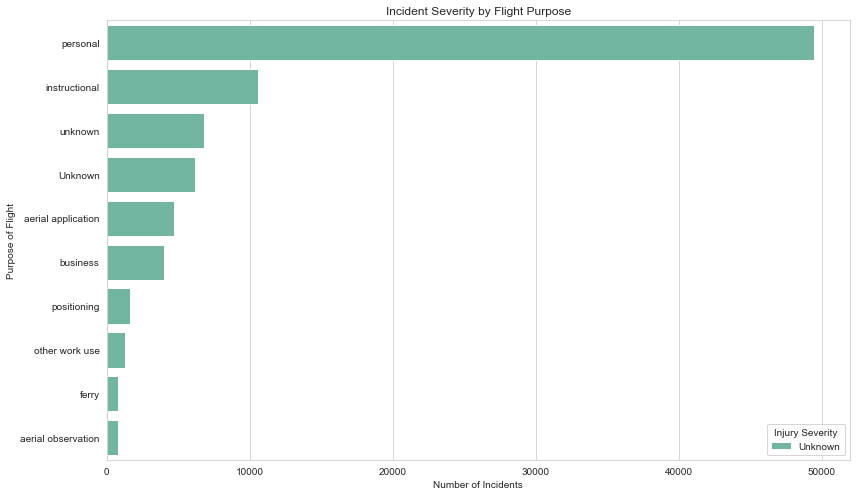

In [24]:
# 1. Map injury severity
injury_severity_mapping = {
    0: 'No Injury',
    1: 'Minor Injury',
    2: 'Serious Injury',
    3: 'Fatal Injury',
    4: 'Unknown'
}

df_cleaned['Injury.Severity'] = df_cleaned['Injury.Severity'].map(injury_severity_mapping)

# 2. Fill any unmapped values as 'Unknown'
df_cleaned['Injury.Severity'] = df_cleaned['Injury.Severity'].fillna('Unknown')

# 3. Now plot safely
plt.figure(figsize=(12, 7))

sns.countplot(
    data=df_cleaned, 
    y='Purpose.of.flight', 
    hue='Injury.Severity', 
    order=df_cleaned['Purpose.of.flight'].value_counts().index[:10],  # top 10
    palette='Set2'
)

plt.title('Incident Severity by Flight Purpose')
plt.xlabel('Number of Incidents')
plt.ylabel('Purpose of Flight')
plt.legend(title='Injury Severity')
plt.tight_layout()
plt.show()



### Incidents Over Time

Are incidents increasing or decreasing over the years?

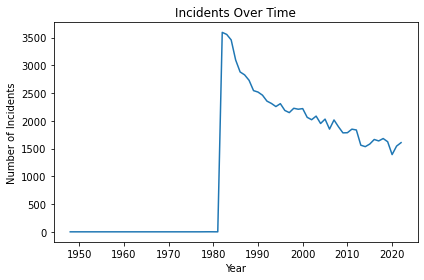

In [13]:
incident_trend = df['event_year'].value_counts().sort_index()

plt.plot(incident_trend.index, incident_trend.values)
plt.title('Incidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.tight_layout()
plt.show()

### Broad Phase of Flight vs. Severity

Which flight phases are riskier?

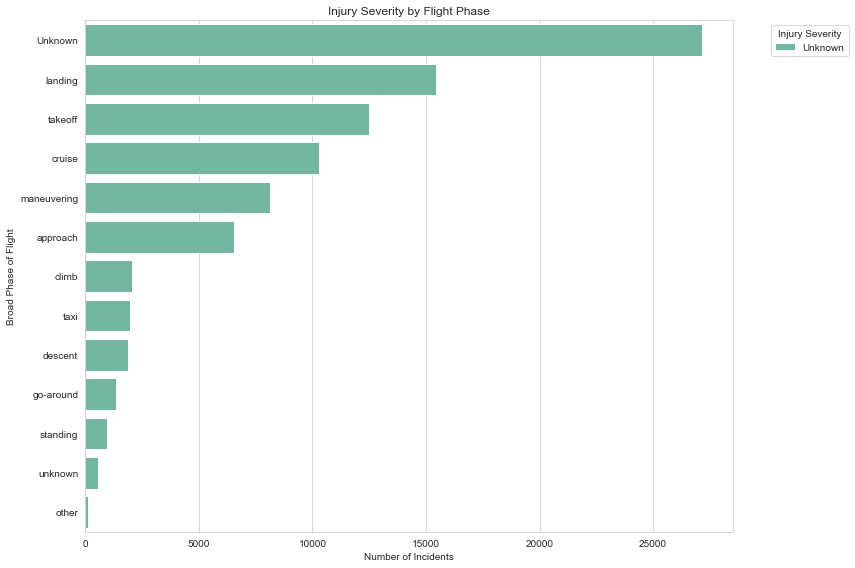

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Make sure Injury Severity is mapped correctly (if not done already)
injury_severity_mapping = {
    0: 'No Injury',
    1: 'Minor Injury',
    2: 'Serious Injury',
    3: 'Fatal Injury',
    4: 'Unknown'
}

# Apply mapping on df_cleaned (or df if needed)
df_cleaned['Injury.Severity'] = df_cleaned['Injury.Severity'].map(injury_severity_mapping).fillna('Unknown')

# Step 2: Plot
plt.figure(figsize=(12, 8))  # Bigger figure to avoid tight_layout warnings

sns.countplot(
    data=df_cleaned, 
    y='Broad.phase.of.flight', 
    hue='Injury.Severity',
    order=df_cleaned['Broad.phase.of.flight'].value_counts().index, 
    palette='Set2'
)

plt.title('Injury Severity by Flight Phase')
plt.xlabel('Number of Incidents')
plt.ylabel('Broad Phase of Flight')
plt.legend(title='Injury Severity', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.tight_layout()
plt.show()


## Insights and Recommendations

### Incident Severity Distribution

Insight: The injury severity distribution provides an overview of how severe incidents are. Most incidents seem to fall under minor injuries or no injury categories, while fatal injuries and serious injuries occur much less frequently.

Recommendation: Since the majority of incidents are minor or involve no injuries, the company should focus on improving safety measures that prevent minor injuries, such as better crew training, aircraft maintenance, and safety features. However, it's also essential to have contingency plans and advanced safety protocols for rare but severe incidents (fatal or serious injuries).

### Top Aircraft Makes in Incidents

Insight: The analysis of the top aircraft makes involved in incidents reveals which aircraft brands are most frequently linked to accidents. Aircraft makes with higher incident counts might suggest that the company's fleet composition or aircraft model selection plays a role in incident frequency.

Recommendation: If certain aircraft models are more frequently involved in accidents, a deeper investigation is needed into the maintenance practices and performance of these models. The company should consider investing in aircraft with better safety records or implementing more robust preventive maintenance programs for their existing fleet.

### Severity by Flight Purpose

Insight: The analysis of incident severity by flight purpose highlights that commercial flights tend to experience higher severity levels, while personal flights may involve fewer severe injuries. This could be due to the higher traffic, longer flight durations, or different operational environments in commercial aviation.

Recommendation: For companies entering the commercial aviation market, it's crucial to focus on reducing risks during high-risk phases (e.g., takeoff and landing) through better training, technology, and operational procedures. Additionally, considering the more frequent occurrence of injuries in commercial flights, passenger safety programs should be enhanced, especially for higher-severity incidents.

### Incidents Over Time

Insight: The trend of incidents over the years shows if accidents have been increasing or decreasing. A downward trend could suggest improvements in aviation safety over time, while an upward trend might point to concerns such as growing air traffic, aging fleets, or insufficient safety standards.

Recommendation: If incidents are increasing, the company should prioritize investing in safety technologies, such as advanced avionics, better pilot training programs, and more robust maintenance protocols. Additionally, reviewing past incidents and learning from them will help prevent similar occurrences in the future. It’s also critical to stay up to date with global safety regulations and best practices.